In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv(r'D:\manjula\besant\python\python_anikith\supermarket_sales.csv')

# Quick check
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Convert Time column (Hours & Minutes only)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Extract Hour
df['Hour'] = df['Time'].dt.hour

# Create Time Slot
def time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time Slot'] = df['Hour'].apply(time_slot)

# Check
df[['Date', 'Time', 'Hour', 'Time Slot']].head()


,Date,Time,Hour,Time Slot
0,2019-01-05,1900-01-01 13:08:00,13,Afternoon
1,2019-03-08,1900-01-01 10:29:00,10,Morning
2,2019-03-03,1900-01-01 13:23:00,13,Afternoon
3,2019-01-27,1900-01-01 20:33:00,20,Evening
4,2019-02-08,1900-01-01 10:37:00,10,Morning


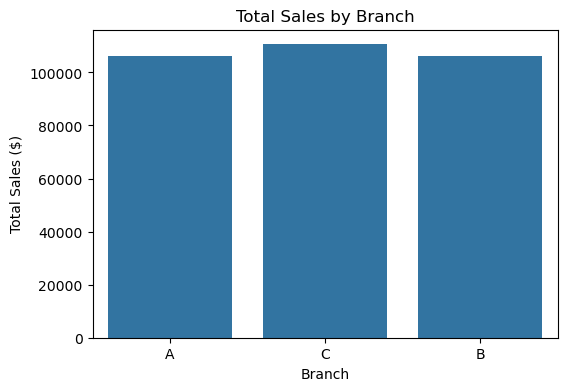

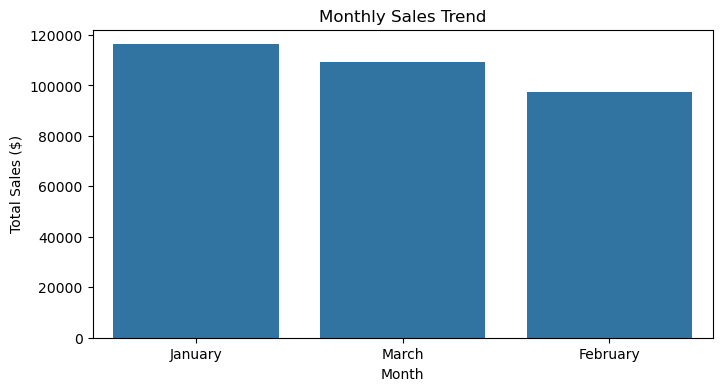

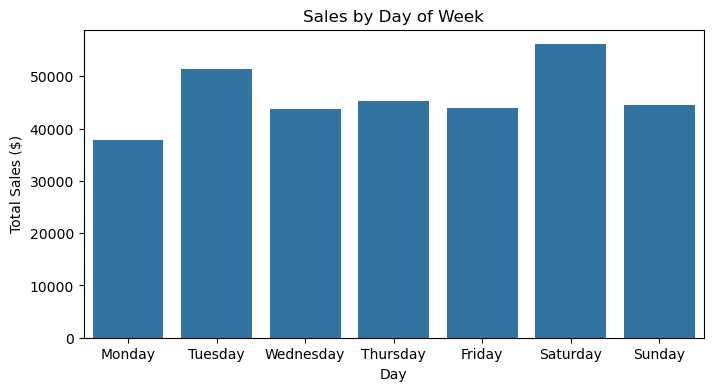

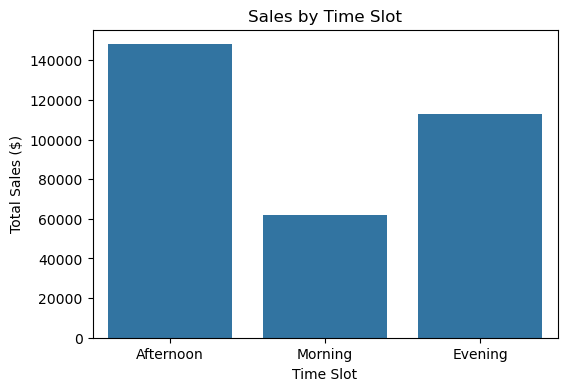

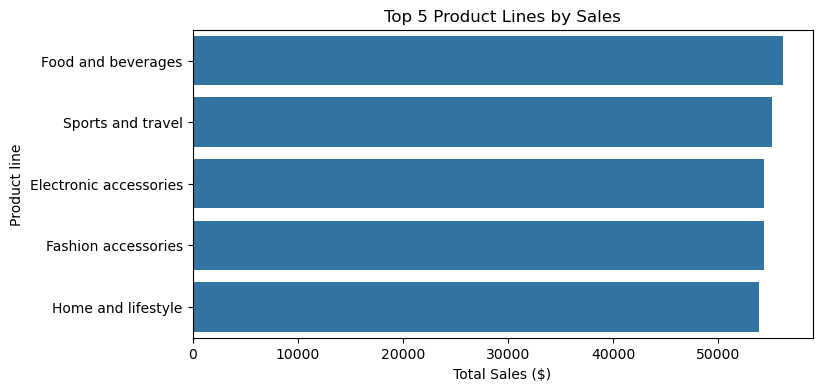

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Branch', y='Total', estimator='sum', errorbar=None)
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales ($)')
plt.show()


df['Month'] = df['Date'].dt.month_name()

plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Month', y='Total', estimator='sum', errorbar=None)
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.show()


df['Day'] = df['Date'].dt.day_name()

order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Day', y='Total', estimator='sum', order=order_days, errorbar=None)
plt.title('Sales by Day of Week')
plt.ylabel('Total Sales ($)')
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Time Slot', y='Total', estimator='sum', errorbar=None)
plt.title('Sales by Time Slot')
plt.ylabel('Total Sales ($)')
plt.show()


top_products = df.groupby('Product line')['Total'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 5 Product Lines by Sales')
plt.xlabel('Total Sales ($)')
plt.show()


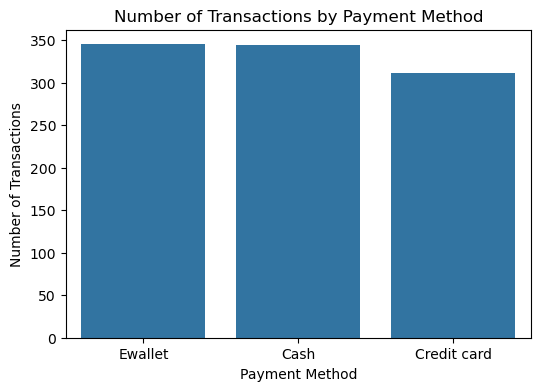

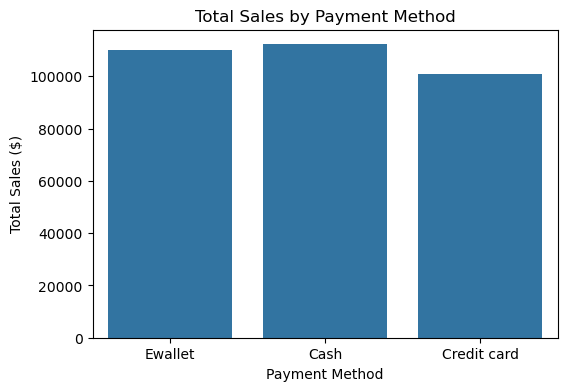

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Payment',order=df['Payment'].value_counts().index)
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=df,x='Payment',y='Total',estimator='sum',errorbar=None)
plt.title('Total Sales by Payment Method')
plt.ylabel('Total Sales ($)')
plt.xlabel('Payment Method')
plt.show()

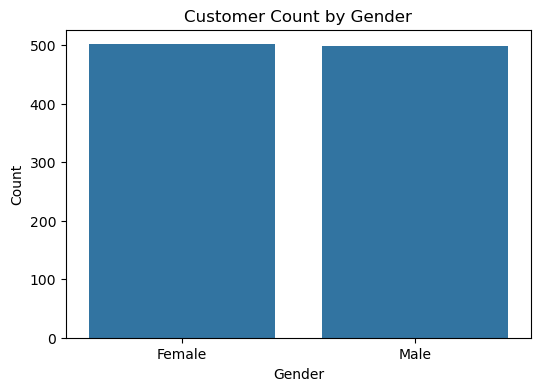

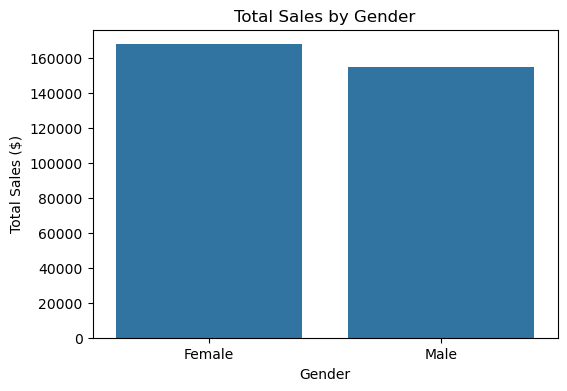

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Gender',order=df['Gender'].value_counts().index)
plt.title('Customer Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=df,x='Gender',y='Total',estimator='sum', errorbar=None)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales ($)')
plt.show()

In [7]:
df.to_csv('supermarket_sales_cleaned.csv', index=False)
